In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

In [2]:
mcname = '../../GRIDBKG/rec_exp20-26_4S_v2_v1.root'

datmc = uproot.open(mcname)

filemc = datmc['mumu'].arrays(library='np')

print("Background:", len(filemc['__experiment__']))

Background: 35239102


In [3]:
epsilon = np.linspace(1e-4, 4e-3, 50)
m = [0.4, 0.6, 0.8, 1, 2, 4, 6, 8, 9]
lumi = 514
bkglumi = 699

In [4]:
mcbkgarr = []

bkg = [[] for i in range(len(m))] 
bkgsel = [[] for i in range(len(m))]

#SELECTED BACKGROUND
bkgselect = [[] for i in range(len(m))]

for k in range(int(len(filemc['ap_InvM'])*lumi/bkglumi)):
    choice = np.random.randint(0,len(filemc['ap_InvM']))
    mcbkgarr.append(filemc['ap_InvM'][choice])

# for j in range(len(m)):

#     range_ = (0.95*m[j], 1.05*m[j])

#     bins_ = 30
            
#     for p in mcbkgarr:
#         if p>range_[0] and p<range_[1]:
#             bkg[j].append(p)

In [5]:
import numpy as np

for j in range(len(m)):
    my_array = bkg[j]

    file_path = 'output' + str(m[j]) + '_514.txt'

    np.savetxt(file_path, my_array, fmt='%f', delimiter=',')


In [6]:
hist, bins = np.histogram(mcbkgarr, bins = 100)

In [7]:
bins = bins[:-1] + np.diff(bins)/2

Text(0.5, 0, "$m_{A'} \\; (GeV)$")

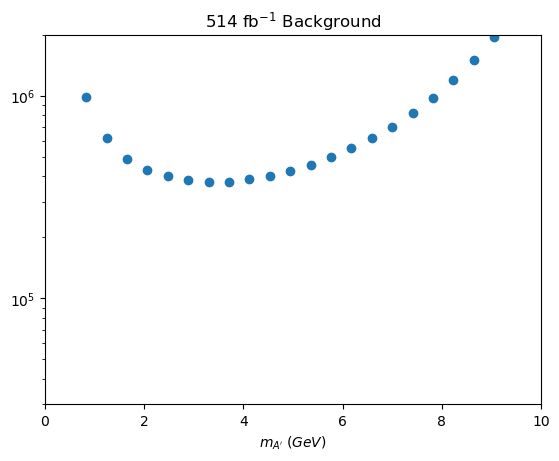

In [8]:
plt.plot(bins, hist, 'o')
plt.xlim(0,10)
plt.yscale('log')
plt.ylim(3e4,2e6)
plt.title(r"514 fb$^{-1}$ Background")
plt.xlabel(r"$m_{A'} \; (GeV)$")